### Import Required Libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno
import seaborn as sns

from wordcloud import WordCloud, STOPWORDS

In [2]:
data_frame = pd.read_csv("winemag-data-130k-v2.csv")

In [3]:
data_frame.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [4]:
data_frame.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')

In [5]:
data_frame = data_frame.drop("Unnamed: 0", axis=1)

In [6]:
data_frame.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title',
       'variety', 'winery'],
      dtype='object')

In [7]:
data_frame.shape

(129971, 13)

In [8]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 12.9+ MB


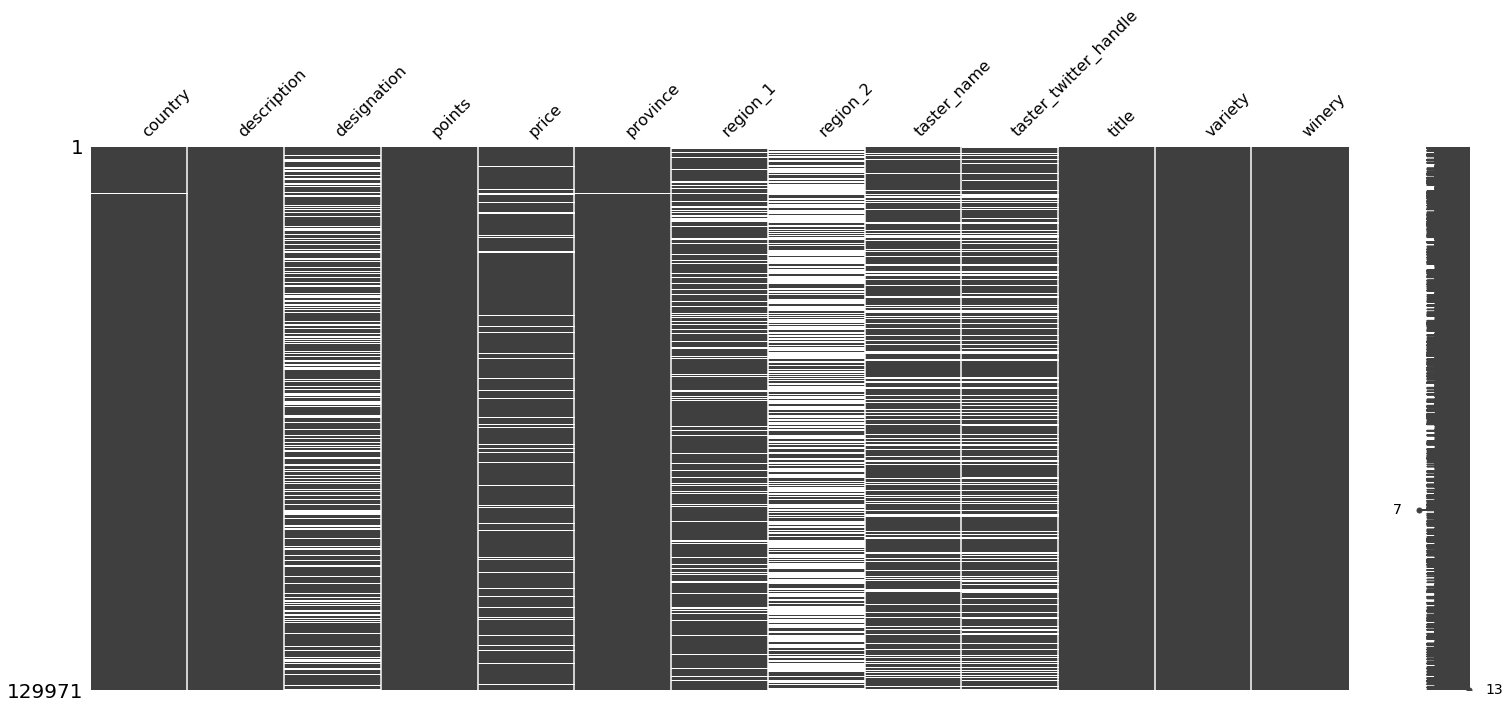

In [9]:
missingno.matrix(data_frame)

In [10]:
data_frame.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title',
       'variety', 'winery'],
      dtype='object')

### EDA 

In [11]:
data_frame.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


### Price Distribution

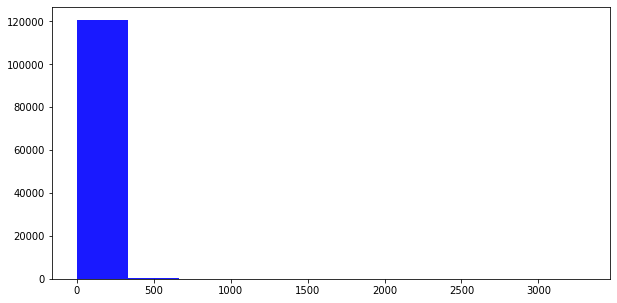

In [43]:
plt.figure(figsize=(10,5))
data_frame["price"].hist(alpha=0.9, grid=False, color='blue')
plt.show()

In [44]:
filtered_data_frame = data_frame[data_frame["price"] < 400]

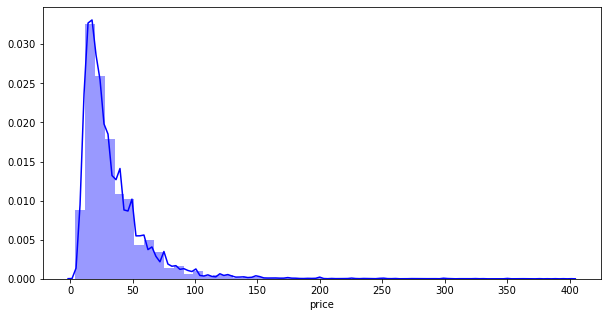

In [59]:
plt.figure(figsize=(10,5))
sns.distplot(filtered_data_frame['price'], color='blue')
plt.show()

### EDA Country

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

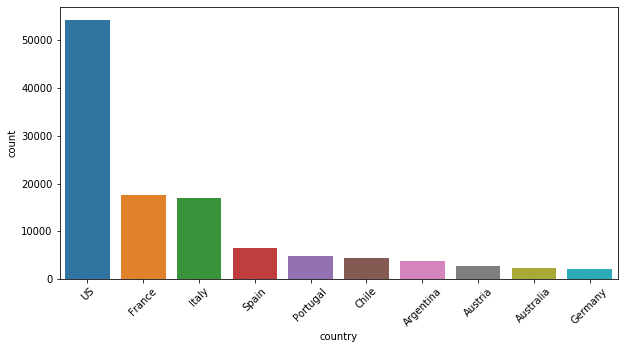

In [45]:
plt.figure(figsize=(10,5))
sns.countplot(x="country", data=filtered_data_frame, order=filtered_data_frame["country"].value_counts().iloc[:10].index)
plt.xticks(rotation=45)

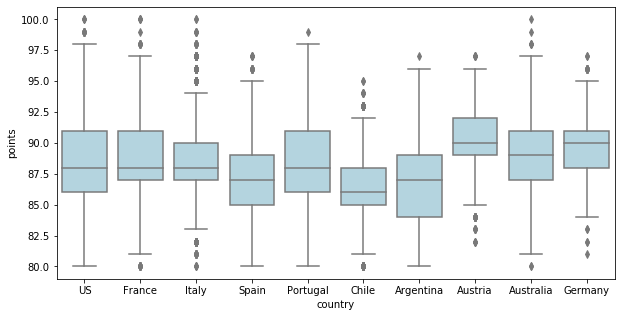

In [46]:
plt.figure(figsize=(10,5))
sns.boxplot(x='country', y='points', data=filtered_data_frame, order=filtered_data_frame["country"].value_counts().iloc[:10].index,color='lightblue')
plt.show()

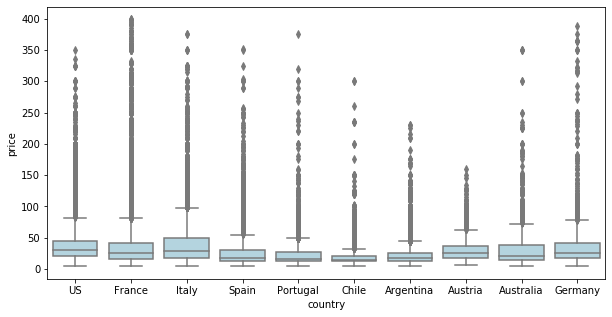

In [47]:
plt.figure(figsize=(10,5))
sns.boxplot(x='country', y='price', data=filtered_data_frame, order=filtered_data_frame["country"].value_counts().iloc[:10].index,color='lightblue')
plt.show()

### EDA Provinces

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

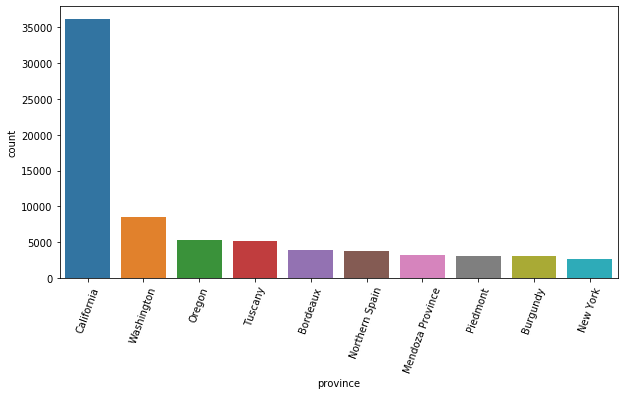

In [48]:
plt.figure(figsize=(10,5))
sns.countplot(x="province", data=filtered_data_frame, order=filtered_data_frame["province"].value_counts().iloc[:10].index)
plt.xticks(rotation=70)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

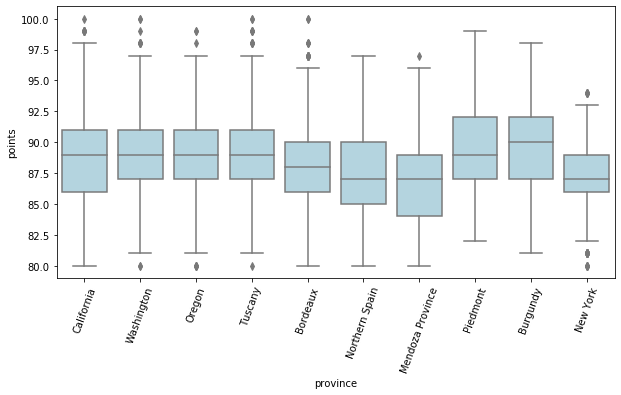

In [55]:
plt.figure(figsize=(10,5))
sns.boxplot(x='province', y='points', data=filtered_data_frame, order=filtered_data_frame["province"].value_counts().iloc[:10].index,color='lightblue')
plt.xticks(rotation=70)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

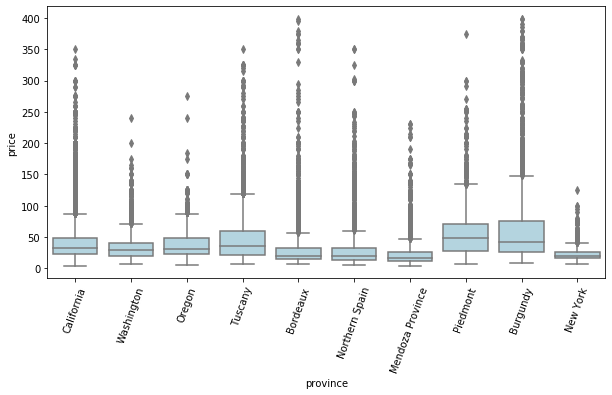

In [56]:
plt.figure(figsize=(10,5))
sns.boxplot(x='province', y='price', data=price_data_frame, order=price_data_frame["province"].value_counts().iloc[:10].index,color='lightblue')
plt.xticks(rotation=70)

### Points Counts

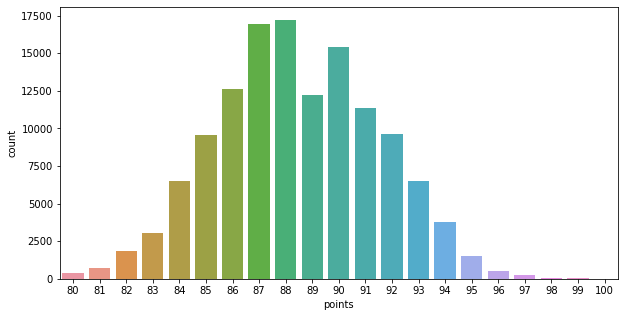

In [57]:
plt.figure(figsize=(10,5))
sns.countplot(x="points", data=data_frame)

### Top 10 Tasters Name

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

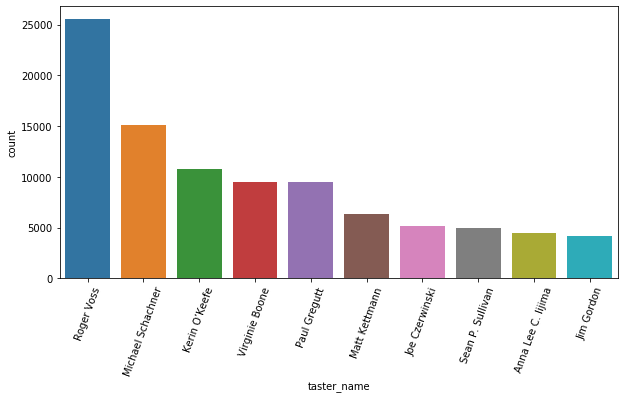

In [15]:
plt.figure(figsize=(10,5))
sns.countplot(x="taster_name", data=data_frame, order=data_frame["taster_name"].value_counts().iloc[:10].index)
plt.xticks(rotation=70)

### Top 10 Winery

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

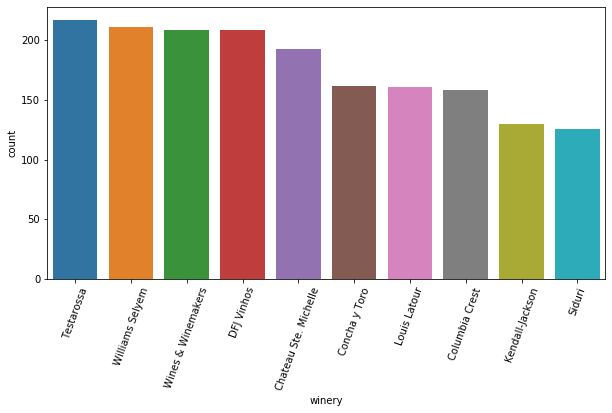

In [60]:
plt.figure(figsize=(10,5))
sns.countplot(x="winery", data=filtered_data_frame, order=filtered_data_frame["winery"].value_counts().iloc[:10].index)
plt.xticks(rotation=70)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

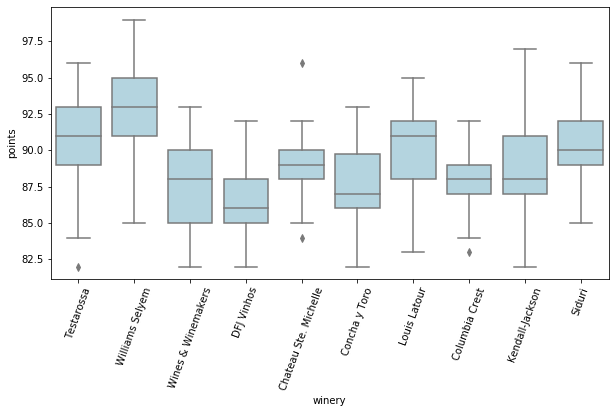

In [61]:
plt.figure(figsize=(10,5))
sns.boxplot(x='winery', y='points', data=filtered_data_frame, order=filtered_data_frame["winery"].value_counts().iloc[:10].index,color='lightblue')
plt.xticks(rotation=70)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

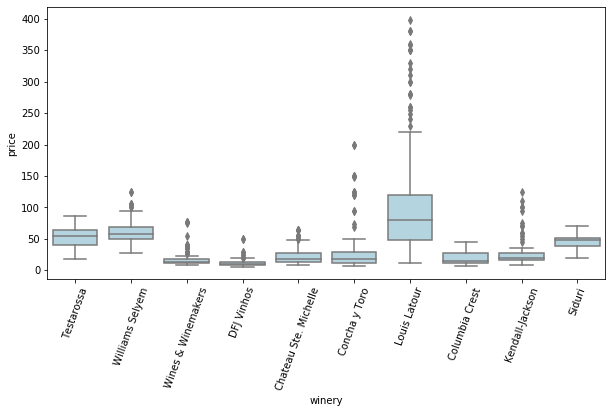

In [63]:
plt.figure(figsize=(10,5))
sns.boxplot(x='winery', y='price', data=filtered_data_frame, order=filtered_data_frame["winery"].value_counts().iloc[:10].index,color='lightblue')
plt.xticks(rotation=70)

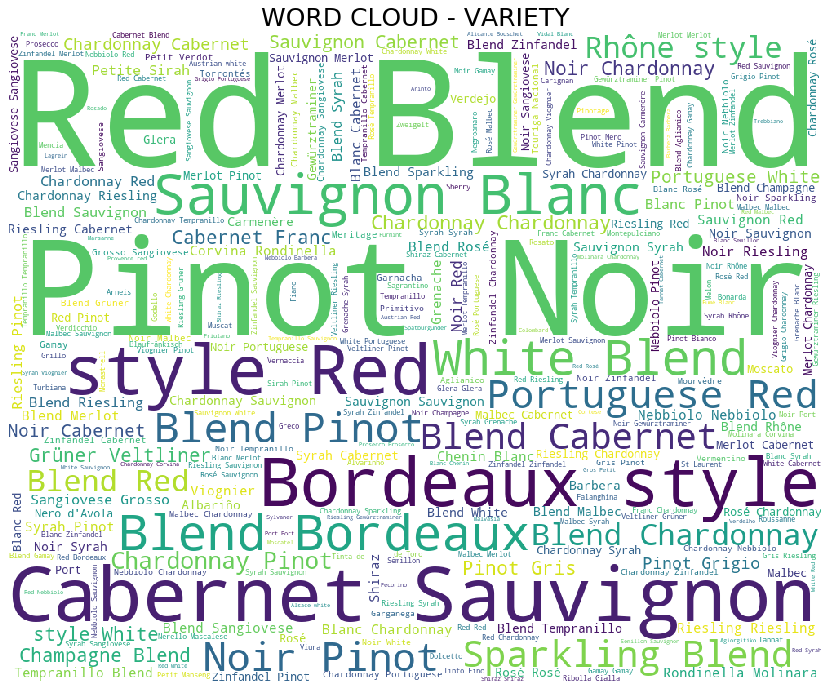

In [17]:
stopwords = set(STOPWORDS)

wordcloud = WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words=300,
    max_font_size=200, 
    width=1000, height=800,
    random_state=42,
).generate(" ".join(data_frame['variety'].astype(str)))


fig = plt.figure(figsize = (16,12))
plt.imshow(wordcloud)
plt.title("WORD CLOUD - VARIETY",fontsize=25)
plt.axis('off')
plt.show()

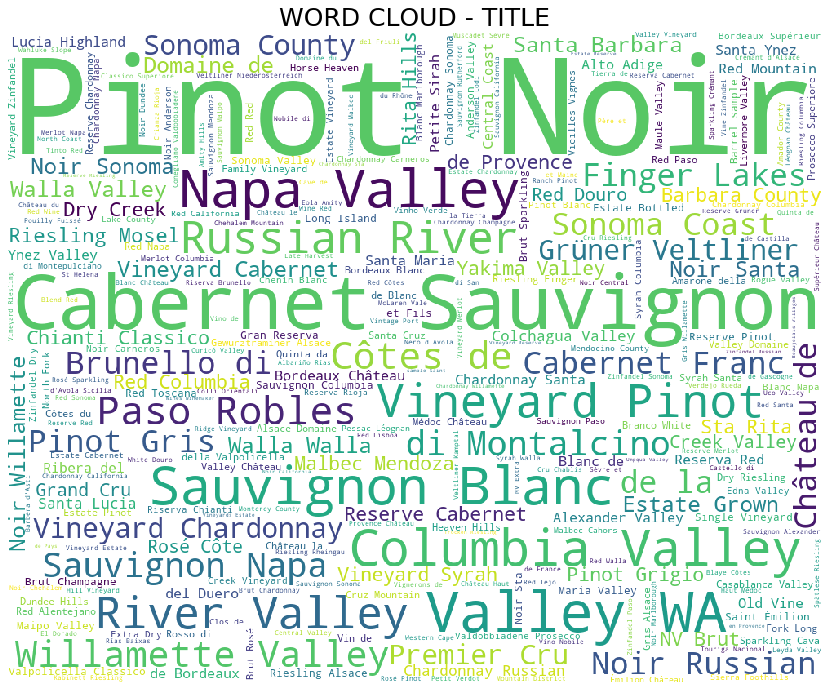

In [65]:
wordcloud = WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words=300,
    max_font_size=200, 
    width=1000, height=800,
    random_state=42,
).generate(" ".join(data_frame['title'].astype(str)))


fig = plt.figure(figsize = (16,12))
plt.imshow(wordcloud)
plt.title("WORD CLOUD - TITLE",fontsize=25)
plt.axis('off')
plt.show()